In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [18]:
def plot3D(x,y,p):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")

    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [19]:
def laplace2D(p,y,dx,dy,l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1,1:-1] = (dy**2*(pn[1:-1,2:]+pn[1:-1,0:-2])+dx**2*(pn[2:,1:-1]+pn[0:-2,1:-1]))/(2*(dx**2+dy**2))
        p[:,0] = 0
        p[:,-1] = y
        p[0,:] = p[1,:]
        p[-1,:] = p[-2,:]
        l1norm = np.sum(np.abs(p[:])-np.abs(pn[:]))/np.sum(np.abs(pn[:]))
   
    return p



In [20]:
def poisson2D(p,b,dx,dy,nx,ny):
        
    pd = p.copy()
    
    p[1:-1,1:-1] = (dy**2*(pd[1:-1,2:]+pd[1:-1,0:-2])+dx**2*(pd[2:,1:-1]+pd[0:-2,1:-1])-b[1:-1,1:-1]*dx**2*dy**2)/(2*(dx**2+dy**2))
    
    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0
   
    return p

In [21]:
#Define the domain

nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0 
ymax = 1

dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)


#Initial Conditions
p = np.zeros((ny,nx))
b = np.zeros((ny,nx))
x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)

#Source
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100


for n in range(nt):
    p = poisson2D(p,b,y,dx,dy,nx,ny)


TypeError: poisson2D() takes 6 positional arguments but 7 were given

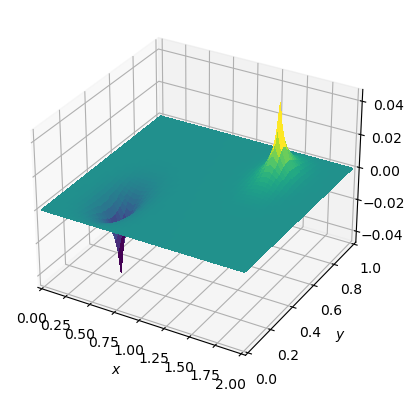

In [ ]:
plot3D(x,y,p)